   ## Simple classification

Generate a training set of images of simple geometric shapes

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


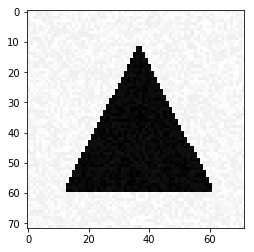

In [1]:
from mp1 import *
[X_train, Y_train] = generate_dataset_classification(300, 20)

In [2]:
# transform Y_train
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)

Using TensorFlow backend.


### Stochastic gradient descent optimizer

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# create model
n_col = X_train.shape[1]
model = Sequential()
model.add(Dense(3,activation='softmax',input_shape=(n_col,)))
# Use stochastic gradient descent optimizer
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd)
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 9.9110
Epoch 2/10
300/300 [==============================] - 0s 156us/step - loss: 11.3364
Epoch 3/10
300/300 [==============================] - 0s 186us/step - loss: 11.3364
Epoch 4/10
300/300 [==============================] - 0s 136us/step - loss: 11.3364
Epoch 5/10
300/300 [==============================] - 0s 123us/step - loss: 11.3364
Epoch 6/10
300/300 [==============================] - 0s 180us/step - loss: 11.3364
Epoch 7/10
300/300 [==============================] - 0s 130us/step - loss: 11.3364
Epoch 8/10
300/300 [==============================] - 0s 143us/step - loss: 11.3364
Epoch 9/10
300/300 [==============================] - 0s 126us/step - loss: 11.3364
Epoch 10/10
300/300 [==============================] - 0s 173us/step - loss: 11.3364


array([[0., 0., 1.]], dtype=float32)

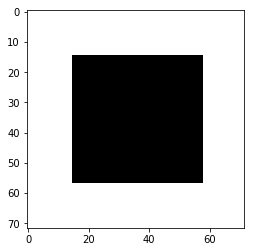

In [4]:
# check classifier
X_test = generate_a_rectangle()
plt.imshow(X_test.reshape(72,72), cmap='gray')
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

### Adam optimizer

In [5]:
# create model
n_col = X_train.shape[1]
model2 = Sequential()
model2.add(Dense(3,activation='softmax',input_shape=(n_col,)))
# Use Adam optimizer
model2.compile(loss='categorical_crossentropy',optimizer='adam')
model2.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 0s 824us/step - loss: 1.8695
Epoch 2/10
300/300 [==============================] - 0s 193us/step - loss: 1.0136
Epoch 3/10
300/300 [==============================] - 0s 166us/step - loss: 0.6728
Epoch 4/10
300/300 [==============================] - 0s 136us/step - loss: 0.4632
Epoch 5/10
300/300 [==============================] - 0s 146us/step - loss: 0.3273
Epoch 6/10
300/300 [==============================] - 0s 170us/step - loss: 0.2639
Epoch 7/10
300/300 [==============================] - 0s 120us/step - loss: 0.2245
Epoch 8/10
300/300 [==============================] - 0s 170us/step - loss: 0.2543
Epoch 9/10
300/300 [==============================] - 0s 150us/step - loss: 0.1909
Epoch 10/10
300/300 [==============================] - 0s 126us/step - loss: 0.2413


array([[1., 0., 0.]], dtype=float32)

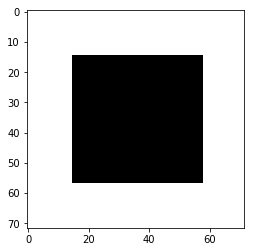

In [6]:
# check classifier
X_test2 = generate_a_disk()
plt.imshow(X_test.reshape(72,72), cmap='gray')
X_test2 = X_test2.reshape(1, X_test2.shape[0])
model2.predict(X_test)

## Visualization of the Solution

In [7]:
[W1, W2] = model2.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

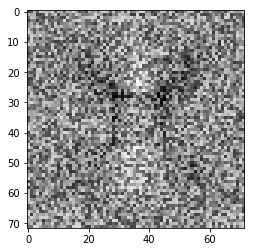

In [8]:
plt.imshow(w10.reshape(72,72), cmap='gray')

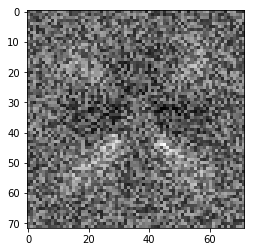

In [9]:
plt.imshow(w11.reshape(72,72), cmap='gray')

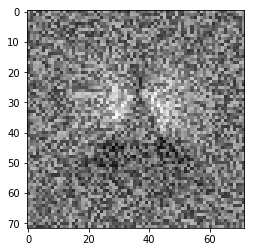

In [10]:
plt.imshow(w12.reshape(72,72), cmap='gray')

In [11]:
weights = model2.get_weights()

## A More Difficult Classification Problem

### Retrain linear classifier

In [19]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [18]:
np.random.seed(42)
[X_test, Y_test] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [22]:
Y_test = to_categorical(Y_test)

In [20]:
#Retrain linear classifier
Y_train = to_categorical(Y_train)
# create model
n_col = X_train.shape[1]
model2 = Sequential()
model2.add(Dense(3,activation='softmax',input_shape=(n_col,)))
# Use Adam optimizer
model2.compile(loss='categorical_crossentropy',optimizer='adam')
model2.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 0s 602us/step - loss: 2.4072
Epoch 2/10
300/300 [==============================] - 0s 146us/step - loss: 1.5236
Epoch 3/10
300/300 [==============================] - 0s 120us/step - loss: 1.0798
Epoch 4/10
300/300 [==============================] - 0s 156us/step - loss: 1.0146
Epoch 5/10
300/300 [==============================] - 0s 133us/step - loss: 1.0556
Epoch 6/10
300/300 [==============================] - 0s 143us/step - loss: 0.9504
Epoch 7/10
300/300 [==============================] - ETA: 0s - loss: 1.078 - 0s 130us/step - loss: 0.9314
Epoch 8/10
300/300 [==============================] - 0s 143us/step - loss: 0.8999
Epoch 9/10
300/300 [==============================] - 0s 163us/step - loss: 1.0134
Epoch 10/10
300/300 [==============================] - 0s 130us/step - loss: 0.9379


In [23]:
# evaluate classifier
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 226us/step


10.799123980204264

### Train a CNN

In [24]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True);
Y_train = to_categorical(Y_train)
np.random.seed(42)
[X_test, Y_test] = generate_dataset_classification(300, 20, True);
Y_test = to_categorical(Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [26]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')

In [27]:
# create the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1)))
print(model.output_shape)
model.add(MaxPooling2D(pool_size=(2, 2)))
print(model.output_shape)
from keras.layers import Dropout
model.add(Dropout(0.25))
print(model.output_shape)

(None, 68, 68, 16)
(None, 34, 34, 16)
(None, 34, 34, 16)


In [28]:
from keras.layers import Flatten
model.add(Flatten())
print(model.output_shape)

(None, 18496)


In [29]:
from keras.layers import Dense
model.add(Dense(144, activation='relu'))
print(model.output_shape)
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
print(model.output_shape)

(None, 144)
(None, 3)


In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, Y_train,batch_size=32, epochs=15, verbose=1)

Epoch 1/15
300/300 [==============================] - 2s 6ms/step - loss: 0.2399 - acc: 0.9167
Epoch 2/15
300/300 [==============================] - 1s 5ms/step - loss: 0.2186 - acc: 0.9367
Epoch 3/15
300/300 [==============================] - 1s 5ms/step - loss: 0.1457 - acc: 0.9567
Epoch 4/15
300/300 [==============================] - 2s 5ms/step - loss: 0.1181 - acc: 0.9733
Epoch 5/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0914 - acc: 0.9833
Epoch 6/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0674 - acc: 0.9867
Epoch 7/15
300/300 [==============================] - 2s 5ms/step - loss: 0.0581 - acc: 0.9967
Epoch 8/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0351 - acc: 1.0000
Epoch 9/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0392 - acc: 0.9900
Epoch 10/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0247 - acc: 1.0000
Epoch 11/15
300/300 [============================

In [33]:
loss,accuracy = model.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 2ms/step


In [35]:
print("The loss is: {}".format(loss))
print("The accuracy is: {}".format(accuracy))

The loss is: 0.9262210345268249
The accuracy is: 0.7299999992052714


## Regression problem

In [36]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


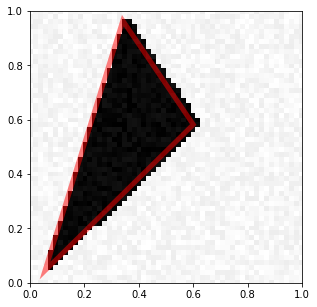

In [57]:
visualize_prediction(X_train[1], Y_train[1])

In [38]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [48]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')

In [83]:
import math
def normal_triangle(Y):
    
    G = [(Y[0]+Y[2]+Y[4])/3.0, (Y[1]+Y[3]+Y[5])/3.0]
    
    p =[[Y[0],Y[1], math.sqrt(Y[0]**2 + Y[1]**2)],
        [Y[2],Y[3], math.sqrt(Y[2]**2 + Y[3]**2)],
        [Y[4],Y[5], math.sqrt(Y[4]**2 + Y[5]**2)]]
    
    p.sort(key=lambda x:x[2])
        
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

In [84]:
y_train = np.zeros([X_train.shape[0], 6])
y_test = np.zeros([X_test.shape[0], 6])
for i in range(X_train.shape[0]):
    y_train[i] = normal_triangle(Y_train[i])
for i in range(X_test.shape[0]):
    y_test[i] = normal_triangle(Y_test[i])

In [97]:
# create the model
model = Sequential()
model.add(Conv2D(32,(3, 3), activation="relu", input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6))

In [108]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32,epochs=14,validation_data=(X_test, y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/14
300/300 [==============================] - 4s 13ms/step - loss: 0.0788 - acc: 0.5367 - val_loss: 0.0521 - val_acc: 0.4667
Epoch 2/14
300/300 [==============================] - 2s 8ms/step - loss: 0.0268 - acc: 0.6667 - val_loss: 0.0378 - val_acc: 0.6533
Epoch 3/14
300/300 [==============================] - 2s 7ms/step - loss: 0.0154 - acc: 0.7033 - val_loss: 0.0357 - val_acc: 0.6133
Epoch 4/14
300/300 [==============================] - 2s 8ms/step - loss: 0.0091 - acc: 0.7800 - val_loss: 0.0346 - val_acc: 0.6367
Epoch 5/14
300/300 [==============================] - 2s 8ms/step - loss: 0.0058 - acc: 0.7833 - val_loss: 0.0326 - val_acc: 0.6333
Epoch 6/14
300/300 [==============================] - 2s 8ms/step - loss: 0.0039 - acc: 0.8200 - val_loss: 0.0320 - val_acc: 0.6400
Epoch 7/14
300/300 [==============================] - 3s 8ms/step - loss: 0.0028 - acc: 0.8400 - val_loss: 0.0320 - val_acc: 0.6300
Epoch 8/14
300/300 [=========

In [109]:
Y_pred = model.predict(X_test, batch_size=32)

In [110]:
loss,accuracy = model.evaluate(X_test, y_test)
print("The loss is: {}".format(loss))
print("The accuracy is: {}".format(accuracy))

300/300 [==============================] - 1s 2ms/step
The loss is: 0.030669022500514984
The accuracy is: 0.6699999996026357


## Image denoising

In [1]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
from keras.models import Model
import random

Using TensorFlow backend.


### Redefine the function

In [2]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [3]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

In [4]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

In [5]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

In [6]:
def generate_dataset_denoising(nb_samples, free_location=False):
    im1, im2 = generate_a_rectangle()
    im_size = im1.shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        noise=np.random.randint(100)
        if category == 0:
            [X[i], Y[i]] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            [X[i], Y[i]] = generate_a_disk(noise, free_location)
        else:
            [X[i], Y[i]] = generate_a_triangle(noise, free_location)
    X = X / 255.0
    Y = Y / 255.0
    return [X, Y]

In [7]:
def generate_test_set_denoising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300, True)
    return [X_test, Y_test]

### Generate data

In [18]:
[X_train_noise, X_train_clean] = generate_dataset_denoising(600, True)
[X_test_noise, X_test_clean] = generate_test_set_denoising()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [21]:
x_train_clean = X_train_clean.reshape(len(X_train_clean), 72, 72, 1)
x_train_noise = X_train_noise.reshape(len(X_train_noise), 72, 72, 1)
x_test_clean = X_test_clean.reshape(len(X_test_clean), 72, 72, 1)
x_test_noise = X_test_noise.reshape(len(X_test_noise), 72, 72, 1)

In [22]:
input_img = Input(shape=(72, 72, 1))

In [25]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [26]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [27]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
autoencoder.fit(x_train_noise, x_train_clean, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test_noise, x_test_clean))

Train on 600 samples, validate on 300 samples
Epoch 1/10
600/600 [==============================] - 14s 24ms/step - loss: 0.3772 - val_loss: 0.1818
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0880 - val_loss: 0.0294
Epoch 3/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0267 - val_loss: 0.0247
Epoch 4/10
600/600 [==============================] - 15s 26ms/step - loss: 0.0224 - val_loss: 0.0194
Epoch 5/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0190 - val_loss: 0.0170
Epoch 6/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 7/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0146 - val_loss: 0.0127
Epoch 8/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0124 - val_loss: 0.0112
Epoch 9/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0107 - val_loss: 0.0101
Epoch 10/10
600/600 [===============

In [29]:
x_pred_clean = autoencoder.predict(x_test_noise, batch_size=32)

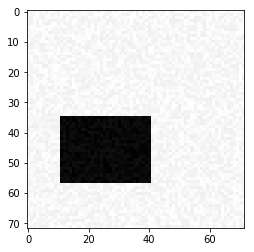

In [30]:
j = random.randint(0,300)
plt.imshow(x_test_noise[j].reshape(72,72), cmap='gray')

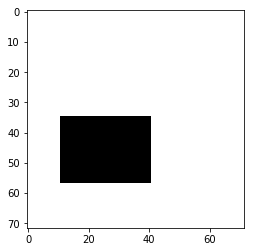

In [31]:
plt.imshow(x_test_clean[j].reshape(72,72), cmap='gray')

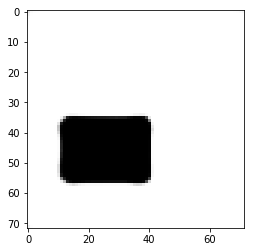

In [32]:
plt.imshow(x_pred_clean[j].reshape(72,72), cmap='gray')